In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

path ='s3_files/paris' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['date'] = file_
    list_.append(df)
frame = pd.concat(list_)

In [2]:
frame.head()

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,32318670,2016-05-28 15:02:36.461396,48.890179,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
1,6,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,15373479,2016-05-28 15:01:08.142988,48.884428,...,4.0,NaN,Clignancourt,4.5,201.0,NaN,7,3016646,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,17234626,2016-05-28 14:59:53.744825,48.872106,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,16964249,2016-05-28 14:59:35.280944,48.845801,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
4,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,10229835,2016-05-28 14:52:35.797141,48.870084,...,5.0,NaN,Porte-Saint-Martin,5.0,109.0,NaN,23,1982586,Entire home/apt,NaN


In [3]:
frame.info()
paris = frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629621 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629621 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629621 non-null object
host_id                 629621 non-null int64
last_modified           629621 non-null object
latitude                629621 non-null float64
location                262698 non-null object
longitude               629621 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629621 non-null object
overall_satisfaction    543234 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629621 non-null int64
room_i

In [4]:
# i am going to drop null values for accommodates 
paris = paris[np.isfinite(paris['accommodates'])]
paris = paris[np.isfinite(paris['price'])]

paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629611 non-null object
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    543230 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_i

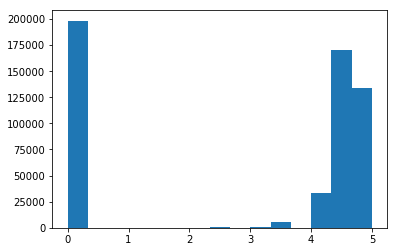

In [5]:
# i may impute overall satisfaction using the mean. first, i'll check out the distribution
rating_vals = paris[np.isfinite(paris['overall_satisfaction'])]
plt.hist(rating_vals.overall_satisfaction, bins=15)
plt.show()

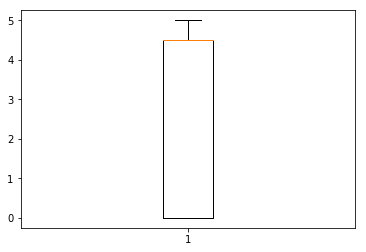

In [6]:
plt.boxplot(rating_vals.overall_satisfaction)
plt.show()

In [7]:
paris[paris['overall_satisfaction'] < 1]

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,15669323,2017-01-03 17:52:52.270369,48.890375,...,NaN,NaN,Clignancourt,0.0,92.0,NaN,0,6057158,Shared room,NaN
1,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,106863421,2017-01-03 17:52:52.268115,48.886701,...,NaN,NaN,Grandes-Carrières,0.0,92.0,NaN,0,16326530,Shared room,NaN
2,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,95001052,2017-01-03 17:52:52.265788,48.842081,...,NaN,NaN,Auteuil,0.0,93.0,NaN,1,15535840,Shared room,NaN
3,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,22530701,2017-01-03 17:52:50.752525,48.852422,...,NaN,NaN,Charonne,0.0,65.0,NaN,0,11771527,Shared room,NaN
5,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,26095542,2017-01-03 17:52:50.745691,48.861540,...,NaN,NaN,Roquette,0.0,70.0,NaN,0,5515531,Shared room,NaN
6,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,20548553,2017-01-03 17:52:48.467473,48.847386,...,NaN,NaN,Quinze-Vingts,0.0,65.0,NaN,0,16173285,Shared room,NaN
7,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,26617709,2017-01-03 17:52:48.463249,48.866520,...,NaN,NaN,Folie-Méricourt,0.0,70.0,NaN,2,5148247,Shared room,NaN
8,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,2893280,2017-01-03 17:52:48.460854,48.891803,...,NaN,NaN,Grandes-Carrières,0.0,76.0,NaN,0,4692372,Shared room,NaN
9,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,35866668,2017-01-03 17:52:48.458013,48.885582,...,NaN,NaN,Plaine-Monceau,0.0,75.0,NaN,0,9300900,Shared room,NaN
10,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0762_2017-...,13689310,2017-01-03 17:52:48.455633,48.883500,...,NaN,NaN,Saint-Vincent-de-Paul,0.0,65.0,NaN,1,7178563,Shared room,NaN


In [8]:
# most with a rating of 0 have no reviews
paris[paris['overall_satisfaction'].isnull()]

,accommodates,bathrooms,bedrooms,borough,city,country,date,host_id,last_modified,latitude,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,32318670,2016-05-28 15:02:36.461396,48.890179,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,17234626,2016-05-28 14:59:53.744825,48.872106,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,16964249,2016-05-28 14:59:35.280944,48.845801,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
7,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,9886443,2016-05-28 14:45:29.701270,48.868062,...,2.0,NaN,Arts-et-Metiers,NaN,69.0,NaN,1,8577332,Private room,NaN
8,3,NaN,0.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,34996605,2016-05-28 14:41:39.421269,48.882026,...,5.0,NaN,Saint-Georges,NaN,91.0,NaN,2,6839481,Entire home/apt,NaN
10,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,33357223,2016-05-28 14:39:51.393281,48.886987,...,1.0,NaN,Goutte-dOr,NaN,69.0,NaN,0,11249047,Entire home/apt,NaN
12,4,NaN,2.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,7504411,2016-05-28 14:39:24.741264,48.866780,...,3.0,NaN,Folie-Méricourt,NaN,69.0,NaN,0,7363128,Entire home/apt,NaN
14,1,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,34764075,2016-05-28 14:37:34.457347,48.824788,...,3.0,NaN,Petit-Montrouge,NaN,58.0,NaN,1,7294846,Private room,NaN
15,1,NaN,0.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,7929416,2016-05-28 14:37:13.127480,48.890531,...,1.0,NaN,Grandes-Carrières,NaN,12.0,NaN,1,7297279,Entire home/apt,NaN
16,2,NaN,1.0,NaN,NaN,NaN,s3_files/paris/tomslee_airbnb_paris_0435_2016-...,18241302,2016-05-28 14:36:03.643704,48.869367,...,1.0,NaN,Porte-Saint-Martin,NaN,69.0,NaN,0,3620806,Private room,NaN


In [9]:
# all rentals with 0 reviews have either a null rating or a rating of 0 
zero = paris[paris['reviews'] == 0]
zero.describe()

,accommodates,bathrooms,bedrooms,borough,country,host_id,latitude,longitude,minstay,overall_satisfaction,price,reviews,room_id,survey_id
count,172850.000000,0.0,172734.000000,0.0,0.0,1.728500e+05,172850.000000,172850.000000,35993.000000,119402.0,172850.000000,172850.0,1.728500e+05,70467.000000
mean,3.064432,NaN,1.107460,NaN,NaN,3.406647e+07,48.864330,2.343282,3.018615,0.0,121.008267,0.0,1.091089e+07,1270.016703
std,1.466659,NaN,0.835733,NaN,NaN,3.220763e+07,0.019150,0.035618,2.881955,0.0,160.002763,0.0,5.195136e+06,161.175788
min,1.000000,NaN,0.000000,NaN,NaN,2.626000e+03,48.816114,2.230293,1.000000,0.0,9.000000,0.0,3.109000e+03,1077.000000
25%,2.000000,NaN,1.000000,NaN,NaN,8.975188e+06,48.849907,2.319574,1.000000,0.0,64.000000,0.0,6.897198e+06,1146.000000
50%,2.000000,NaN,1.000000,NaN,NaN,2.371700e+07,48.865521,2.346254,2.000000,0.0,88.000000,0.0,1.179418e+07,1350.000000
75%,4.000000,NaN,1.000000,NaN,NaN,4.842834e+07,48.880840,2.371144,4.000000,0.0,131.000000,0.0,1.486241e+07,1478.000000
max,16.000000,NaN,10.000000,NaN,NaN,1.432046e+08,48.901698,2.468284,30.000000,0.0,10865.000000,0.0,2.014408e+07,1478.000000


In [10]:
# to get rid of some null values, replace all overall satisfaction #s with 0 if there are 0 reviews
paris.loc[paris['reviews'] == 0, 'overall_satisfaction'] = 0


In [11]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 22 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
date                    629611 non-null object
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    596678 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_i

Since there is such a big split in the data between 0's for ratings and ratings between 4 and 5, I don't feel comfortable imputing the rest of the rating data. There is still a ton of data to work with, so I will eliminate the remaining null values. 

In [12]:
paris = paris[np.isfinite(paris['overall_satisfaction'])]


In [13]:
# convert last updated to datetime object, drop columns I don't care about
paris['last_modified'] = pd.to_datetime(paris['last_modified'])

paris = paris.drop(['bathrooms', 'city', 'borough', 'latitude', 'country', 'location', 'longitude', 'name', 'property_type', 
                   'survey_id'], axis=1)


In [14]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 12 columns):
accommodates            596678 non-null int64
bedrooms                596281 non-null float64
date                    596678 non-null object
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 93925 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 59.2+ MB


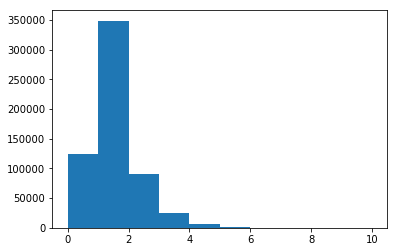

In [15]:
# i will assume if a minstay isn't included, it is 1 
paris['minstay'].fillna(1, inplace=True)

bedroom_vals = paris[np.isfinite(paris['bedrooms'])]
plt.hist(bedroom_vals.bedrooms)
plt.show()

# i feel good about imputing the mean value for missing bedrooms
paris['bedrooms'].fillna(int(paris['bedrooms'].mean()), inplace=True)


In [22]:
paris['bedrooms_per_person'] = paris['bedrooms'] / paris['accommodates']

paris[paris['accommodates'] == 0]

paris.info()

paris.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 14 columns):
accommodates            596678 non-null int64
bedrooms                596678 non-null float64
date                    596678 non-null object
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 596678 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
people_per_bedroom      596678 non-null float64
bedrooms_per_person     596678 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(3)
memory usage: 68.3+ MB


,accommodates,bedrooms,host_id,minstay,overall_satisfaction,price,reviews,room_id,people_per_bedroom,bedrooms_per_person
count,596678.000000,596678.000000,5.966780e+05,596678.000000,596678.000000,596678.000000,596678.000000,5.966780e+05,5.966780e+05,596678.000000
mean,3.085552,1.067019,2.835253e+07,1.284731,2.670718,109.254365,14.083454,8.893860e+06,inf,0.352387
std,1.500853,0.812218,2.897899e+07,1.460815,2.299306,119.728935,28.421108,5.430761e+06,NaN,0.239643
min,1.000000,0.000000,1.415000e+03,1.000000,0.000000,8.000000,0.000000,2.525000e+03,1.666667e-01,0.000000
25%,2.000000,1.000000,6.855991e+06,1.000000,0.000000,60.000000,0.000000,4.217281e+06,2.000000e+00,0.250000
50%,2.000000,1.000000,1.770822e+07,1.000000,4.500000,83.000000,4.000000,8.452109e+06,2.500000e+00,0.400000
75%,4.000000,1.000000,3.935284e+07,1.000000,4.500000,121.000000,14.000000,1.354392e+07,4.000000e+00,0.500000
max,16.000000,10.000000,1.432046e+08,695.000000,5.000000,11323.000000,529.000000,2.014408e+07,inf,6.000000


I want to look at the change in reviews over time. I will examine the number of reviews from the May 26, 2016 to July 25, 2017. 

In [23]:
paris.date.unique()

array(['s3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv',
       's3_files/paris/tomslee_airbnb_paris_0515_2016-08-10.csv',
       's3_files/paris/tomslee_airbnb_paris_0762_2017-01-01.csv',
       's3_files/paris/tomslee_airbnb_paris_0809_2017-01-19.csv',
       's3_files/paris/tomslee_airbnb_paris_0892_2017-02-18.csv',
       's3_files/paris/tomslee_airbnb_paris_1000_2017-03-28.csv',
       's3_files/paris/tomslee_airbnb_paris_1077_2017-04-16.csv',
       's3_files/paris/tomslee_airbnb_paris_1146_2017-04-25.csv',
       's3_files/paris/tomslee_airbnb_paris_1350_2017-06-16.csv',
       's3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv'], dtype=object)

In [24]:
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv', 'date'] = '2016-05-26'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0515_2016-08-10.csv', 'date'] = '2016-08-10'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0762_2017-01-01.csv', 'date'] = '2017-01-01'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0809_2017-01-19.csv', 'date'] = '2017-01-19'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_0892_2017-02-18.csv', 'date'] = '2017-02-18'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1000_2017-03-28.csv', 'date'] = '2017-03-28'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1077_2017-04-16.csv', 'date'] = '2017-04-16'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1146_2017-04-25.csv', 'date'] = '2017-04-25'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1350_2017-06-16.csv', 'date'] = '2017-06-16'
paris.loc[paris['date'] == 's3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv', 'date'] = '2017-07-25'



In [25]:

paris['date_time'] = pd.to_datetime(paris['date'])

In [26]:
rentals = paris.pivot(index='room_id', columns='date_time', values='reviews')

I am only interested in looking at rentals that have been on AirBnb for every data scrape; if rentals go on and off the site then we can't account for the time that they've been offline. 

In [27]:
rentals = rentals.dropna()

In [28]:
pct_change = pd.DataFrame()

In [29]:
# calculate compound monthly growth rate 

pct_change['diff'] = (rentals['2017-07-25 00:00:00'] / rentals['2016-05-26 00:00:00'])

In [30]:

pct_change['compound_monthly_growth'] = np.power(pct_change['diff'], 1/14) - 1 
pct_change['room_id'] = rentals.index.values



In [47]:
paris_may = pd.read_csv('s3_files/paris/tomslee_airbnb_paris_0435_2016-05-26.csv')
paris_jul = pd.read_csv('s3_files/paris/tomslee_airbnb_paris_1478_2017-07-25.csv')

In [48]:
# merge cmgr info with rental description info. 

paris_may.info()
paris_may['bedrooms_per_person'] = paris_may['bedrooms'] / paris_may['accommodates']
paris_jul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55951 entries, 0 to 55950
Data columns (total 14 columns):
room_id                 55951 non-null int64
host_id                 55951 non-null int64
room_type               55951 non-null object
borough                 0 non-null float64
neighborhood            55951 non-null object
reviews                 55951 non-null int64
overall_satisfaction    28182 non-null float64
accommodates            55951 non-null int64
bedrooms                55701 non-null float64
price                   55951 non-null float64
minstay                 54559 non-null float64
latitude                55951 non-null float64
longitude               55951 non-null float64
last_modified           55951 non-null object
dtypes: float64(7), int64(4), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70158 entries, 0 to 70157
Data columns (total 21 columns):
room_id                 70158 non-null int64
survey_id               70158 no

In [49]:
paris_may = paris_may.drop(['borough', 'overall_satisfaction', 'price', 'minstay'], axis=1)
paris_jul = paris_jul[['room_id', 'price', 'reviews']]

In [50]:
paris_may = paris_may[np.isfinite(paris_may['bedrooms'])]
paris_may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55701 entries, 0 to 55950
Data columns (total 11 columns):
room_id                55701 non-null int64
host_id                55701 non-null int64
room_type              55701 non-null object
neighborhood           55701 non-null object
reviews                55701 non-null int64
accommodates           55701 non-null int64
bedrooms               55701 non-null float64
latitude               55701 non-null float64
longitude              55701 non-null float64
last_modified          55701 non-null object
bedrooms_per_person    55701 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 5.1+ MB


In [51]:
paris_growth = paris_may.merge(pct_change)
paris_growth = paris_growth.merge(paris_jul, on='room_id')


In [52]:
neighborhoods = pd.read_csv('paris_quartier.csv')
neighborhoods = neighborhoods[['L_QU', 'C_AR']]
neighborhoods.columns = ['neighborhood', 'arrondissement']
paris_growth =  paris_growth.merge(neighborhoods)


In [53]:
paris_growth = paris_growth[['room_type', 'reviews_x', 'reviews_y', 'accommodates', 'bedrooms', 'arrondissement', 
                             'diff', 'compound_monthly_growth', 'price', 'bedrooms_per_person']]

paris_growth['rev_change'] = paris_growth['reviews_y'] - paris_growth['reviews_x']

In [54]:
paris_growth['log_price'] = np.log10(paris_growth.price)

In [55]:
# examine rentals with a change in number of reviews over time. 

nc = paris_growth[paris_growth['rev_change'] == 0]
change = paris_growth[paris_growth['rev_change'] > 0]

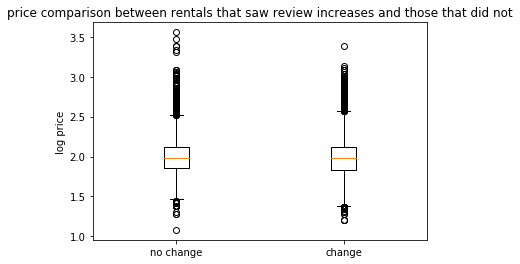

In [56]:
plt.boxplot([nc.log_price, change.log_price])
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('log price')
plt.title('price comparison between rentals that saw review increases and those that did not')
plt.show()

In [75]:
# i am going to compare many different linear models 
# i am going to build a function to expedite this process

import statsmodels.api as sm
from statsmodels.formula.api import ols

# build a linear model to compare prices of rentals that saw a change in reviews vs those that did not 
def linear_model(df1, df2):
    # linear model 1 
    X_sm = df1[['room_type', 'accommodates', 'bedrooms', 'arrondissement']]
    X_sm = pd.get_dummies(X_sm, columns =['room_type', 'arrondissement'])
    X_sm = X_sm.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)
    X_sm = sm.add_constant(X_sm)
    y_sm = df1['log_price']
    lm_sm = sm.OLS(y_sm, X_sm).fit()

    
    # linear model 2 
    X_lg = df2[['room_type','accommodates', 'bedrooms', 'arrondissement']]
    X_lg = pd.get_dummies(X_lg, columns =['room_type', 'arrondissement'])
    X_lg = X_lg.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)
    X_lg = sm.add_constant(X_lg)
    y_lg = df2['log_price']
    lm_lg = sm.OLS(y_lg, X_lg).fit()
    
    print(lm_sm.summary())
    print(lm_lg.summary())
    
    return [X_sm, lm_sm, X_lg, lm_lg]
    
    

In [76]:
X_nc, lm_nc, X_c, lm_c = linear_model(nc, change)



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     300.5
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:44:03   Log-Likelihood:                 2622.1
No. Observations:                7710   AIC:                            -5196.
Df Residuals:                    7686   BIC:                            -5029.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [77]:
# create a function that will calculate z-score
def z_score(B1, B2, se1, se2):
    numerator = B1 - B2
    inner_denom = np.abs(np.power(se1,2) - np.power(se2, 2))
    denominator = np.power(inner_denom, 0.5)
    zscore = numerator / denominator
    return zscore


# create a funciton that will compare all coefficients 
def compare_coefficients(X1, lm1, X2, lm2):
    coef_sm = []
    for i in lm1.params:
        coef_sm.append(i)

    se_sm = []
    for i in lm1.bse:
        se_sm.append(i)
    
       
    sm_df = pd.DataFrame()
    sm_df['variable'] = X1.columns
    sm_df['coef_sm'] = coef_sm

    sm_df['se_sm'] = se_sm


    coef_lg = []
    for i in lm2.params:
        coef_lg.append(i)

    se_lg = []
    for i in lm2.bse:
        se_lg.append(i)
    
       
    lg_df = pd.DataFrame()
    lg_df['variable'] = X2.columns
    lg_df['coef_lg'] = coef_lg
    lg_df['se_lg'] = se_lg



    df = sm_df.merge(lg_df)
    df['z_score'] = z_score(df.coef_sm, df.coef_lg, df.se_sm, df.se_lg)
    return df   
    

In [78]:
c_nc_df = compare_coefficients(X_nc, lm_nc, X_c, lm_c)

In [79]:
# compare cofficients - rentals that had a change in their number of reviews vs those that did not
c_nc_df

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.671657,0.008676,1.600992,0.006459,12.199290
1,accommodates,0.044781,0.002090,0.042275,0.001202,1.465433
2,bedrooms,0.100786,0.003472,0.114645,0.002214,-5.182628
3,room_type_Private room,-0.134572,0.006500,-0.149507,0.004559,3.223292
4,room_type_Shared room,-0.147492,0.027864,-0.348432,0.016609,8.981435
5,arrondissement_1,0.284012,0.018675,0.274087,0.009419,0.615508
6,arrondissement_2,0.192227,0.015954,0.193880,0.008441,-0.122116
7,arrondissement_3,0.208786,0.014342,0.225589,0.007712,-1.389503
8,arrondissement_4,0.234425,0.016046,0.264674,0.007914,-2.167136
9,arrondissement_5,0.167202,0.014485,0.196311,0.008372,-2.462683


In [80]:
def split_data(df, column, threshold):
    df1 = df[df[column] <= threshold]
    df2 = df[df[column] >= threshold]
    return df1, df2 

pct_50, pct_50plus = split_data(paris_growth, 'rev_change', np.percentile(paris_growth.rev_change, 50))
X_50, lm_50, X_50p, lm_50p = linear_model(pct_50,pct_50plus)




                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     500.7
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:44:09   Log-Likelihood:                 3887.1
No. Observations:               10844   AIC:                            -7726.
Df Residuals:                   10820   BIC:                            -7551.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [81]:
ab_50_df = compare_coefficients(X_50, lm_50, X_50p, lm_50p)
ab_50_df

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.647900,0.007207,1.603895,0.007137,43.972073
1,accommodates,0.046380,0.001681,0.041279,0.001292,4.749064
2,bedrooms,0.102896,0.002851,0.115265,0.002405,-8.074696
3,room_type_Private room,-0.134270,0.005506,-0.149985,0.004914,6.325797
4,room_type_Shared room,-0.175835,0.024600,-0.348349,0.017146,9.779942
5,arrondissement_1,0.306538,0.014891,0.260751,0.010020,4.156985
6,arrondissement_2,0.191680,0.012864,0.191960,0.009008,-0.030535
7,arrondissement_3,0.228577,0.010879,0.216774,0.008380,1.701370
8,arrondissement_4,0.245475,0.012149,0.262721,0.008522,-1.991730
9,arrondissement_5,0.185565,0.011603,0.187126,0.009027,-0.214120


In [82]:
# look at 75th percentile 
pct_75, pct_75plus = split_data(paris_growth, 'rev_change', np.percentile(paris_growth.rev_change, 75))
X_75, lm_75, X_75p, lm_75p = linear_model(pct_75,pct_75plus)
ab_75_df = compare_coefficients(X_75, lm_75, X_75p, lm_75p)
ab_75_df



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     900.8
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:44:33   Log-Likelihood:                 6399.8
No. Observations:               16329   AIC:                        -1.275e+04
Df Residuals:                   16305   BIC:                        -1.257e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.633892,0.005780,1.607721,0.011551,2.616894
1,accommodates,0.045427,0.001293,0.039455,0.001745,5.091557
2,bedrooms,0.106974,0.002236,0.107906,0.003465,-0.352261
3,room_type_Private room,-0.141142,0.004485,-0.141966,0.006589,0.170780
4,room_type_Shared room,-0.219856,0.019973,-0.353808,0.019461,29.814317
5,arrondissement_1,0.298873,0.010899,0.243467,0.014228,6.057704
6,arrondissement_2,0.196856,0.009310,0.186869,0.013247,1.059772
7,arrondissement_3,0.228115,0.008059,0.197849,0.012760,3.059308
8,arrondissement_4,0.259808,0.008765,0.249634,0.012726,1.102728
9,arrondissement_5,0.178926,0.008574,0.196044,0.013760,-1.590534


In [83]:
# look at 95th percentile

pct_95, pct_95plus = split_data(paris_growth, 'rev_change', np.percentile(paris_growth.rev_change, 95))
X_95, lm_95, X_95p, lm_95p = linear_model(pct_95,pct_95plus)
ab_95_df = compare_coefficients(X_95, lm_95, X_95p, lm_95p)
ab_95_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1156.
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:44:35   Log-Likelihood:                 8425.4
No. Observations:               20558   AIC:                        -1.680e+04
Df Residuals:                   20534   BIC:                        -1.661e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.636369,0.005251,1.601729,0.024690,1.435859
1,accommodates,0.042068,0.001091,0.041503,0.003935,0.149287
2,bedrooms,0.110584,0.001950,0.087071,0.007988,3.035334
3,room_type_Private room,-0.143304,0.003912,-0.135041,0.013248,-0.652849
4,room_type_Shared room,-0.287040,0.015424,-0.293052,0.037865,0.173853
5,arrondissement_1,0.269532,0.008780,0.213750,0.028829,2.031450
6,arrondissement_2,0.181019,0.007746,0.184843,0.026776,-0.149196
7,arrondissement_3,0.209091,0.006865,0.185074,0.026772,0.928115
8,arrondissement_4,0.246891,0.007222,0.230111,0.026388,0.661151
9,arrondissement_5,0.177523,0.007397,0.173194,0.030215,0.147769


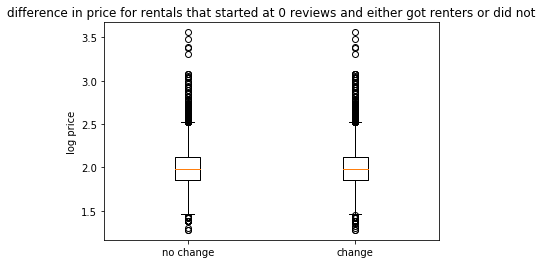

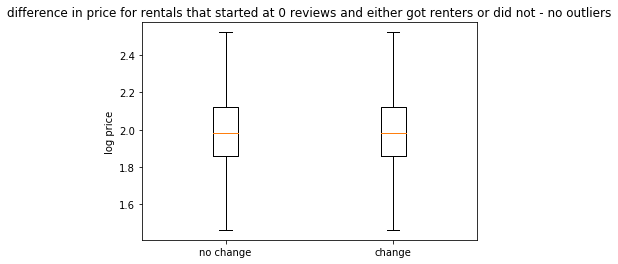

In [84]:
# before looking at compound monthly growth rate, first look at rentals that started with 0 reviews and didn't change
# compare with those that started at 0 and ended up with rentals 

norev_start = paris_growth[paris_growth['reviews_x'] == 0]

nc_0, c_0 = split_data(norev_start, 'rev_change', 0)

plt.boxplot([nc_0.log_price, c_0.log_price])
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('log price')
plt.title('difference in price for rentals that started at 0 reviews and either got renters or did not')
plt.show()


plt.boxplot([nc_0.log_price, c_0.log_price], showfliers=False)
plt.xticks([1,2], ['no change', 'change'])
plt.ylabel('log price')
plt.title('difference in price for rentals that started at 0 reviews and either got renters or did not - no outliers')
plt.show()



In [85]:
# compare linear model

X_nc, lm_nc, X_c, lm_c = linear_model(nc_0,c_0)
cnc_df = compare_coefficients(X_nc, lm_nc, X_c, lm_c)
cnc_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     212.6
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:44:37   Log-Likelihood:                 1820.6
No. Observations:                5716   AIC:                            -3593.
Df Residuals:                    5692   BIC:                            -3434.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.681126,0.010078,1.670286,0.009073,2.470961
1,accommodates,0.047577,0.002485,0.045960,0.002142,1.282947
2,bedrooms,0.095791,0.004062,0.100047,0.003591,-2.240553
3,room_type_Private room,-0.119688,0.007694,-0.124558,0.006954,1.479003
4,room_type_Shared room,-0.134351,0.029720,-0.167110,0.026552,2.453413
5,arrondissement_1,0.279180,0.022626,0.261434,0.019109,1.464776
6,arrondissement_2,0.192336,0.019695,0.189729,0.016053,0.228482
7,arrondissement_3,0.192460,0.017191,0.192175,0.014027,0.028714
8,arrondissement_4,0.234886,0.019293,0.254238,0.015661,-1.717588
9,arrondissement_5,0.168853,0.017884,0.153302,0.014945,1.583219


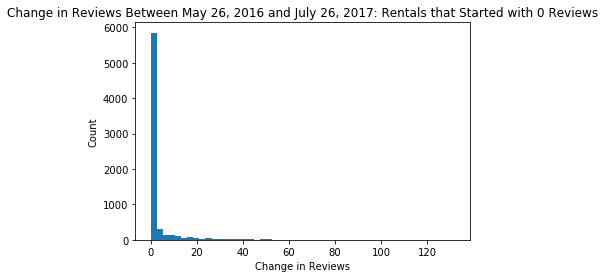

In [86]:
plt.hist(norev_start.rev_change, bins=50)
plt.xlabel('Change in Reviews')
plt.ylabel('Count')
plt.title('Change in Reviews Between May 26, 2016 and July 26, 2017: Rentals that Started with 0 Reviews')
plt.show()

Looks like the vast majority of rentals that started with 0 reviews ended up with 0 reviews. 

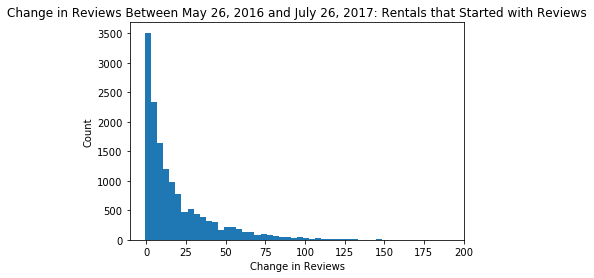

In [87]:
# look at this hist for rentals that start with reviews 
rev_start = paris_growth[paris_growth['reviews_x'] > 0]


plt.hist(rev_start.rev_change, bins=50)
plt.xlabel('Change in Reviews')
plt.ylabel('Count')
plt.title('Change in Reviews Between May 26, 2016 and July 26, 2017: Rentals that Started with Reviews')
plt.show()

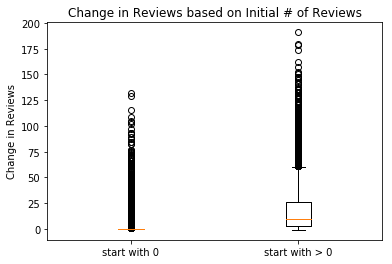

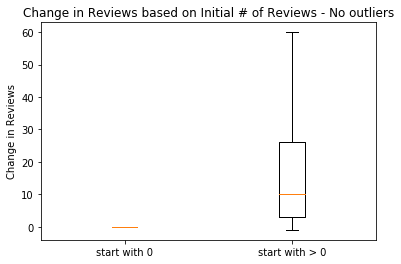

In [102]:
plt.boxplot([norev_start.rev_change, rev_start.rev_change])
plt.xticks([1,2], ['start with 0', 'start with > 0'])
plt.ylabel('Change in Reviews')
plt.title('Change in Reviews based on Initial # of Reviews')
plt.show()

plt.boxplot([norev_start.rev_change, rev_start.rev_change], showfliers=False)
plt.xticks([1,2], ['start with 0', 'start with > 0'])
plt.ylabel('Change in Reviews')
plt.title('Change in Reviews based on Initial # of Reviews - No outliers')
plt.show()

$H_0$ : $\mu_{notreviewed}$ = $\mu_{reviewed}$ 

In [103]:
# test for statistical significance 

import numpy as np 
from scipy import stats

# One-way ANOVA

f, p = stats.f_oneway(norev_start.rev_change, rev_start.rev_change)


print('One-way ANOVA')
print('----------------')
print('F value:', f)
print('P value', p)

One-way ANOVA
----------------
F value: 3022.59677264
P value 0.0


In [104]:
# paris_growth = paris_growth[paris_growth['compound_monthly_growth'] >= 0]
paris_growth

,room_type,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
0,Entire home/apt,0,0,4,2.0,17,NaN,NaN,194.0,0.500000,0,2.287802,NaN,0.000000
1,Entire home/apt,0,0,2,0.0,17,NaN,NaN,78.0,0.000000,0,1.892095,NaN,0.000000
2,Entire home/apt,40,90,6,2.0,17,2.250000,0.059634,78.0,0.333333,50,1.892095,5.963402,3.571429
3,Entire home/apt,33,46,4,2.0,17,1.393939,0.024007,144.0,0.500000,13,2.158362,2.400749,0.928571
4,Entire home/apt,0,0,2,1.0,17,NaN,NaN,59.0,0.500000,0,1.770852,NaN,0.000000
5,Entire home/apt,0,0,8,3.0,17,NaN,NaN,157.0,0.375000,0,2.195900,NaN,0.000000
6,Private room,4,5,2,1.0,17,1.250000,0.016067,36.0,0.500000,1,1.556303,1.606653,0.071429
7,Entire home/apt,3,3,4,1.0,17,1.000000,0.000000,82.0,0.250000,0,1.913814,0.000000,0.000000
8,Entire home/apt,0,0,4,2.0,17,NaN,NaN,96.0,0.500000,0,1.982271,NaN,0.000000
9,Entire home/apt,7,18,2,1.0,17,2.571429,0.069789,84.0,0.500000,11,1.924279,6.978912,0.785714


In [105]:
paris_growth['cmg_pct'] = paris_growth['compound_monthly_growth'] * 100

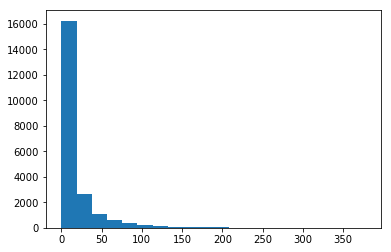

In [106]:
# now it is time to look at compound monthly growth rates. 
# i need to bin my data into groups based on starting # of reviews 

plt.hist(paris_growth.reviews_x, bins=20)
plt.show()

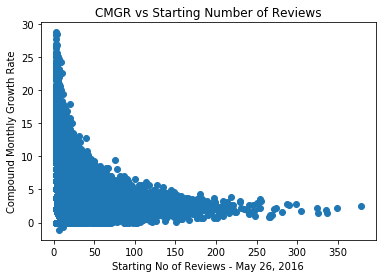

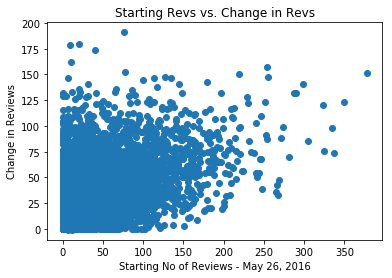

In [107]:
plt.scatter(paris_growth.reviews_x, paris_growth.cmg_pct)
plt.xlabel('Starting No of Reviews - May 26, 2016')
plt.ylabel('Compound Monthly Growth Rate')
plt.title('CMGR vs Starting Number of Reviews')
plt.show()

plt.scatter(paris_growth.reviews_x, paris_growth.rev_change)
plt.xlabel('Starting No of Reviews - May 26, 2016')
plt.ylabel('Change in Reviews')
plt.title('Starting Revs vs. Change in Revs')
plt.show()


We can see that rentals with a low number of reviews have a greater range of compound monthly growth rates. this makes sense, since a small numerical change in the number of reviews will result in a large CMGR. 

We can also see that rentals with a high starting number of reviews tend to have higher change in reviews, but this is not a strong relationship; some rentals with a low number of reviews quickly gain a high number of reviews. We should explore these rentals that see a big change in the # of reviews and those that have a big change in their compound monthly growth rate. 

In [108]:
# bin data based on compound monthly growth rate 
# get rid of infinite values 
paris_swr = paris_growth[paris_growth['reviews_x'] > 0]
np.percentile(paris_swr.cmg_pct, 90)


10.408951367381224

In [109]:
# compare prices of rentals with cmgr above and below the 90th percentile 

cmgr_90, cmgr_90p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 90))
X_cmgr90, lm_cmgr90, X_cmgr90p, lm_cmgr90p = linear_model(cmgr_90, cmgr_90p)
cmgr90_df = compare_coefficients(X_cmgr90, lm_cmgr90, X_cmgr90p, lm_cmgr90p)
cmgr90_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     886.6
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:46:54   Log-Likelihood:                 6194.0
No. Observations:               13257   AIC:                        -1.234e+04
Df Residuals:                   13233   BIC:                        -1.216e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.605923,0.006531,1.628959,0.021761,-1.109699
1,accommodates,0.041563,0.001258,0.039702,0.003619,0.548541
2,bedrooms,0.114577,0.002305,0.117438,0.006969,-0.434973
3,room_type_Private room,-0.154347,0.004645,-0.157211,0.013538,0.225209
4,room_type_Shared room,-0.343521,0.018275,-0.447251,0.048763,2.294433
5,arrondissement_1,0.280243,0.009894,0.247247,0.027482,1.286935
6,arrondissement_2,0.193646,0.008841,0.157762,0.025390,1.507634
7,arrondissement_3,0.229426,0.008004,0.177953,0.024557,2.217177
8,arrondissement_4,0.259239,0.008227,0.223015,0.024854,1.544532
9,arrondissement_5,0.197360,0.008608,0.178745,0.027151,0.722870


There are no significant differences in coefficients here; likely because mainly rentals with a low number of reviews have high cmgr. 

In [110]:
paris_high = paris_swr[paris_swr['cmg_pct'] > 20]

In [111]:
paris_high.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.070000,72.430000,2.940000,0.850000,10.860000,18.141675,0.227513,93.47000,0.285500,68.360000,1.913957,22.751270,4.882857
std,1.512607,28.803849,1.324364,0.715979,5.973037,4.847948,0.021164,56.84401,0.234839,27.633796,0.214127,2.116447,1.973843
min,3.000000,40.000000,1.000000,0.000000,1.000000,13.000000,0.201067,23.00000,0.000000,37.000000,1.361728,20.106741,2.642857
25%,3.000000,51.750000,2.000000,0.000000,5.000000,14.285714,0.209184,59.00000,0.000000,48.000000,1.770852,20.918434,3.428571
50%,3.000000,64.000000,2.000000,1.000000,11.000000,16.690476,0.222698,82.00000,0.291667,60.000000,1.913814,22.269790,4.285714
75%,5.000000,84.250000,4.000000,1.000000,17.000000,20.375000,0.240243,110.25000,0.500000,80.250000,2.042375,24.024302,5.732143
max,10.000000,188.000000,6.000000,3.000000,20.000000,34.333333,0.287342,386.00000,1.000000,179.000000,2.586587,28.734218,12.785714


Places with cmgr greater than 20% range from having 3 to 10 reviews at the start, and their CMGRs range from 20.1% to 28.7%. Price per night ranges from \$23 to \$110 per night. This is interesting, because we would expect places with 1-2 reviews to have high compound monthly growth rates, since if they get just a few reviews each month we would  see fairly high percent increase in rentals. Let's look at rentals with 1 and 2 reviews at the start of this period. 

In [112]:
paris1 = paris_swr[paris_swr['reviews_x'] == 1]
paris2 = paris_swr[paris_swr['reviews_x'] == 2]

paris_swr.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000,14618.000000
mean,24.632234,43.148858,3.236010,1.123409,11.200164,2.234782,0.045125,116.921877,0.352546,18.516623,1.991545,4.512505,1.322616
std,33.073084,49.686667,1.577397,0.825691,5.705147,2.076943,0.042139,90.743191,0.219242,22.703105,0.241155,4.213890,1.621650
min,3.000000,3.000000,1.000000,0.000000,1.000000,0.857143,-0.010950,12.000000,0.000000,-1.000000,1.079181,-1.095037,-0.071429
25%,6.000000,11.000000,2.000000,1.000000,6.000000,1.243950,0.015714,67.000000,0.250000,3.000000,1.826075,1.571449,0.214286
50%,12.000000,25.000000,3.000000,1.000000,11.000000,1.610573,0.034628,95.000000,0.375000,10.000000,1.977724,3.462820,0.714286
75%,29.000000,55.000000,4.000000,1.000000,17.000000,2.363636,0.063370,133.000000,0.500000,26.000000,2.123852,6.336983,1.857143
max,378.000000,529.000000,16.000000,10.000000,20.000000,34.333333,0.287342,2414.000000,1.500000,191.000000,3.382737,28.734218,13.642857


This is because no rentals in this sample started with 1 or 2 reviews. Good to know. 

In [113]:
# look at 25th pctile

cmgr_25, cmgr_25p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 25))
X_cmgr25, lm_cmgr25, X_cmgr25p, lm_cmgr25p = linear_model(cmgr_25, cmgr_25p)
cmgr25_df = compare_coefficients(X_cmgr25, lm_cmgr25, X_cmgr25p, lm_cmgr25p)
cmgr25_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:46:58   Log-Likelihood:                 1661.8
No. Observations:                3655   AIC:                            -3276.
Df Residuals:                    3631   BIC:                            -3127.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.626804,0.012119,1.599115,0.007338,2.870877
1,accommodates,0.039745,0.002614,0.042058,0.001339,-1.030395
2,bedrooms,0.115694,0.004763,0.114597,0.002463,0.269095
3,room_type_Private room,-0.159994,0.008574,-0.152776,0.005151,-1.053123
4,room_type_Shared room,-0.340106,0.049065,-0.354335,0.018209,0.312295
5,arrondissement_1,0.293289,0.023118,0.277265,0.010301,0.774236
6,arrondissement_2,0.206663,0.018501,0.189273,0.009417,1.091996
7,arrondissement_3,0.249674,0.016417,0.221947,0.008677,1.989560
8,arrondissement_4,0.261657,0.017414,0.257761,0.008853,0.259785
9,arrondissement_5,0.211844,0.017224,0.195387,0.009397,1.140037


In [114]:

cmgr_50, cmgr_50p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 50))
X_cmgr50, lm_cmgr50, X_cmgr50p, lm_cmgr50p = linear_model(cmgr_50, cmgr_50p)
cmgr50_df = compare_coefficients(X_cmgr50, lm_cmgr50, X_cmgr50p, lm_cmgr50p)
cmgr50_df


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     462.0
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:46:59   Log-Likelihood:                 3375.4
No. Observations:                7309   AIC:                            -6703.
Df Residuals:                    7285   BIC:                            -6537.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.607771,0.008731,1.605220,0.008978,1.220315
1,accommodates,0.044602,0.001759,0.038842,0.001621,8.437546
2,bedrooms,0.110826,0.003209,0.118128,0.003003,-6.454552
3,room_type_Private room,-0.150451,0.006250,-0.158002,0.006222,12.686514
4,room_type_Shared room,-0.326231,0.030190,-0.364665,0.020672,1.746806
5,arrondissement_1,0.288804,0.014248,0.271434,0.012361,2.451343
6,arrondissement_2,0.186554,0.012470,0.195323,0.011272,-1.644203
7,arrondissement_3,0.238459,0.010965,0.214550,0.010582,8.314736
8,arrondissement_4,0.231249,0.011469,0.276290,0.010723,-11.073216
9,arrondissement_5,0.196294,0.011658,0.198063,0.011556,-1.144911


In [115]:
# look at those with very high cmgrs 

cmgr_95, cmgr_95p = split_data(paris_swr, 'cmg_pct', np.percentile(paris_swr.cmg_pct, 95))
X_cmgr95, lm_cmgr95, X_cmgr95p, lm_cmgr95p = linear_model(cmgr_95, cmgr_95p)
cmgr95_df = compare_coefficients(X_cmgr95, lm_cmgr95, X_cmgr95p, lm_cmgr95p)
cmgr95_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     934.1
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:46:59   Log-Likelihood:                 6510.6
No. Observations:               13909   AIC:                        -1.297e+04
Df Residuals:                   13885   BIC:                        -1.279e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.607297,0.006388,1.623645,0.031888,-0.523286
1,accommodates,0.041047,0.001227,0.042730,0.004870,-0.357211
2,bedrooms,0.115779,0.002250,0.099294,0.009743,1.738985
3,room_type_Private room,-0.154543,0.004536,-0.149856,0.019085,-0.252821
4,room_type_Shared room,-0.349161,0.017751,-0.461567,0.064922,1.799983
5,arrondissement_1,0.277175,0.009591,0.261345,0.039415,0.414065
6,arrondissement_2,0.191670,0.008616,0.168078,0.035592,0.683159
7,arrondissement_3,0.227581,0.007806,0.176806,0.035394,1.470772
8,arrondissement_4,0.256531,0.008034,0.234856,0.035171,0.632986
9,arrondissement_5,0.196243,0.008410,0.190942,0.038498,0.141092


In [116]:
# see if there are large differences between rentals with a cmgr in the 95th percentile and those in the bottom 50% 

X_cmgr50b, lm_cmgr50b, X_cmgr95p, lm_cmgr95p = linear_model(cmgr_50, cmgr_95p)
hilo_df = compare_coefficients(X_cmgr50b, lm_cmgr50b, X_cmgr95p, lm_cmgr95p)
hilo_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     462.0
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:47:00   Log-Likelihood:                 3375.4
No. Observations:                7309   AIC:                            -6703.
Df Residuals:                    7285   BIC:                            -6537.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.607771,0.008731,1.623645,0.031888,-0.517584
1,accommodates,0.044602,0.001759,0.042730,0.004870,0.412107
2,bedrooms,0.110826,0.003209,0.099294,0.009743,1.253580
3,room_type_Private room,-0.150451,0.006250,-0.149856,0.019085,-0.033008
4,room_type_Shared room,-0.326231,0.030190,-0.461567,0.064922,2.354687
5,arrondissement_1,0.288804,0.014248,0.261345,0.039415,0.747207
6,arrondissement_2,0.186554,0.012470,0.168078,0.035592,0.554231
7,arrondissement_3,0.238459,0.010965,0.176806,0.035394,1.832022
8,arrondissement_4,0.231249,0.011469,0.234856,0.035171,-0.108507
9,arrondissement_5,0.196294,0.011658,0.190942,0.038498,0.145849


In [117]:
print(paris_growth.describe())
np.percentile(paris_growth.reviews_x, 95)

          reviews_x     reviews_y  accommodates      bedrooms  arrondissement  \
count  21639.000000  21639.000000  21639.000000  21639.000000    21639.000000   
mean      16.640048     30.106428      3.185591      1.124082       11.814455   
std       29.528034     45.319451      1.534528      0.825237        5.616260   
min        0.000000      0.000000      1.000000      0.000000        1.000000   
25%        0.000000      0.000000      2.000000      1.000000        7.000000   
50%        6.000000     13.000000      3.000000      1.000000       12.000000   
75%       18.000000     38.500000      4.000000      1.000000       17.000000   
max      378.000000    529.000000     16.000000     10.000000       20.000000   

               diff  compound_monthly_growth         price  \
count  1.592300e+04             1.592300e+04  21639.000000   
mean            inf                      inf    118.579833   
std             NaN                      NaN    100.369859   
min    8.571429e-01   

75.0

In [118]:
# bin data by starting no of reviews 
# alreay looked at those starting with 0 revs 
paris_growth['avg_revchange'] = paris_growth['rev_change'] / 14
paris0 = paris_growth[paris_growth['reviews_x'] == 0]
paris25 = paris_growth[(paris_growth['reviews_x'] >= 1) & (paris_growth['reviews_x'] <= 5)]
paris50 = paris_growth[(paris_growth['reviews_x'] >= 6) & (paris_growth['reviews_x'] <= 12)]
paris75 = paris_growth[(paris_growth['reviews_x'] >= 13) & (paris_growth['reviews_x'] <= 29)]
paris95 = paris_growth[(paris_growth['reviews_x'] >= 30) & (paris_growth['reviews_x'] <= 95)]
paris100 = paris_growth[(paris_growth['reviews_x'] >= 96)]



In [119]:
paris25.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000
mean,3.855432,11.535500,3.230111,1.134873,12.120331,3.044535,0.057664,114.962076,0.352144,7.680068,1.978412,5.766361,0.548576
std,0.810250,12.542936,1.489390,0.826543,5.527332,3.401761,0.058793,95.666530,0.219142,12.471886,0.248810,5.879275,0.890849
min,3.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.079181,0.000000,0.000000
25%,3.000000,4.000000,2.000000,1.000000,8.000000,1.000000,0.000000,64.500000,0.250000,0.000000,1.809547,0.000000,0.000000
50%,4.000000,7.000000,3.000000,1.000000,12.000000,1.750000,0.040782,90.000000,0.375000,3.000000,1.954243,4.078221,0.214286
75%,5.000000,13.000000,4.000000,1.000000,17.000000,3.450000,0.092478,133.000000,0.500000,9.000000,2.123852,9.247781,0.642857
max,5.000000,133.000000,16.000000,5.000000,20.000000,34.333333,0.287342,2150.000000,1.500000,129.000000,3.332438,28.734218,9.214286


2,498 rentals started with 1-5 reviews. They ended up with 4-133 rentals at the end of 14 months. The compound monthly growht rates range from 1.3% to 28.73%. Prices range from \$22 per night to \$1298 per night. 

In [120]:
paris50.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000,3980.000000
mean,8.587688,19.641709,3.222111,1.147739,11.681156,2.316756,0.048187,118.840704,0.357577,11.054020,1.993969,4.818745,0.789573
std,1.980452,15.453821,1.553895,0.847380,5.545498,1.859400,0.043478,98.648593,0.218762,15.135124,0.246269,4.347823,1.081080
min,6.000000,6.000000,1.000000,0.000000,1.000000,0.857143,-0.010950,19.000000,0.000000,-1.000000,1.278754,-1.095037,-0.071429
25%,7.000000,10.000000,2.000000,1.000000,7.000000,1.200000,0.013108,66.000000,0.250000,2.000000,1.819544,1.310814,0.142857
50%,8.000000,15.000000,3.000000,1.000000,11.000000,1.666667,0.037161,94.000000,0.400000,6.000000,1.973128,3.716139,0.428571
75%,10.000000,23.000000,4.000000,1.000000,17.000000,2.666667,0.072572,133.000000,0.500000,14.000000,2.123852,7.257171,1.000000
max,12.000000,188.000000,16.000000,6.000000,20.000000,22.000000,0.247060,2414.000000,1.500000,179.000000,3.382737,24.705996,12.785714


3,322 rentals started with 5-12 reviews. They ended up wtih 7-188 rentals. CMGRs range from 0.5% to 24.7%. Prices range from \$19 to \$2414 per night. 

In [121]:
paris75.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000,3591.000000
mean,19.544974,37.847396,3.282094,1.154832,11.026177,1.957954,0.041926,120.692286,0.357203,18.302423,2.005216,4.192571,1.307316
std,4.821392,20.747268,1.641152,0.856877,5.718210,1.046051,0.032341,89.932130,0.220300,19.491928,0.242348,3.234109,1.392281
min,13.000000,13.000000,1.000000,0.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,1.204120,0.000000,0.000000
25%,15.000000,24.000000,2.000000,1.000000,6.000000,1.263158,0.016827,71.000000,0.250000,5.000000,1.851258,1.682678,0.357143
50%,19.000000,32.000000,3.000000,1.000000,11.000000,1.631579,0.035586,96.000000,0.400000,12.000000,1.982271,3.558629,0.857143
75%,23.000000,45.000000,4.000000,1.000000,16.000000,2.266667,0.060193,139.000000,0.500000,24.000000,2.143015,6.019276,1.714286
max,29.000000,200.000000,16.000000,10.000000,20.000000,10.000000,0.178769,1074.000000,1.000000,180.000000,3.031004,17.876863,12.857143


3,324 rentals started with 13-29 reviews. They ended up wtih 14-200 reviews. CMGRs range from 0.2% to 17.8%. Prices range from \$16 per night to \$1074 per night. 

In [122]:
paris95.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000,2852.000000
mean,51.380084,84.003506,3.266830,1.077139,10.056452,1.664356,0.034136,116.640954,0.342809,32.623422,1.998113,3.413611,2.330244
std,17.641029,33.964359,1.682011,0.793482,5.798738,0.530335,0.020934,80.527802,0.220600,24.761546,0.232706,2.093400,1.768682
min,30.000000,30.000000,1.000000,0.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,1.204120,0.000000,0.000000
25%,36.000000,57.000000,2.000000,1.000000,5.000000,1.300000,0.018917,71.000000,0.250000,14.000000,1.851258,1.891701,1.000000
50%,47.000000,79.000000,3.000000,1.000000,10.000000,1.532086,0.030943,96.000000,0.333333,27.000000,1.982271,3.094268,1.928571
75%,63.000000,105.000000,4.000000,1.000000,15.000000,1.896552,0.046778,133.000000,0.500000,46.000000,2.123852,4.677808,3.285714
max,95.000000,267.000000,15.000000,6.000000,20.000000,5.548387,0.130199,964.000000,1.000000,191.000000,2.984077,13.019861,13.642857


2,793 rentals had 30 to 95 reviews at the start. They ended up wtih 31 to 267 reviews. CMGRs range from 0.1% to 13.0% Prices range from \$16 to \$964 per night. 

In [123]:
paris100.describe()

,reviews_x,reviews_y,accommodates,bedrooms,arrondissement,diff,compound_monthly_growth,price,bedrooms_per_person,rev_change,log_price,cmg_pct,avg_revchange
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,139.029070,198.594477,2.978198,0.952035,9.376453,1.442470,0.025747,97.296512,0.341553,59.565407,1.945876,2.574739,4.254672
std,43.907462,61.045427,1.317596,0.602538,5.788295,0.220964,0.010937,49.519166,0.210016,29.669089,0.185359,1.093656,2.119221
min,96.000000,98.000000,1.000000,0.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,1.204120,0.000000,0.000000
25%,107.750000,154.000000,2.000000,1.000000,4.000000,1.288832,0.018289,67.000000,0.250000,38.000000,1.826075,1.828924,2.714286
50%,125.000000,186.000000,2.000000,1.000000,9.000000,1.416667,0.025191,84.500000,0.333333,56.000000,1.926849,2.519112,4.000000
75%,157.000000,228.000000,4.000000,1.000000,15.000000,1.555797,0.032074,112.000000,0.500000,76.250000,2.049218,3.207421,5.446429
max,378.000000,529.000000,11.000000,4.000000,20.000000,2.450000,0.066099,484.000000,1.000000,157.000000,2.684845,6.609910,11.214286


685 rentals had over 95 reviews at the start, with a max of 378. These ended up wtih 104 to 529 reviews at the end of 14 months. CMGRs ranged from 0.05% to 6.6%. Prices range from \$16 to \$484 per night. 

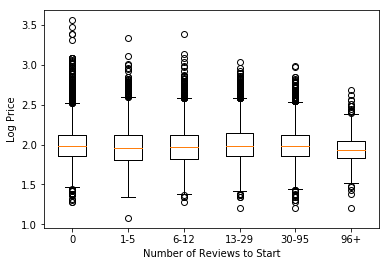

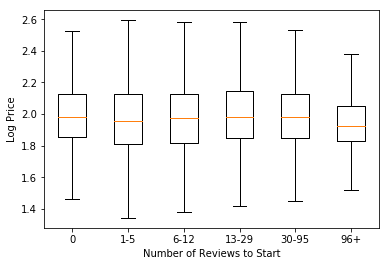

In [124]:
# visualize these groups 

plt.boxplot([paris0.log_price, paris25.log_price, paris50.log_price, paris75.log_price, paris95.log_price, paris100.log_price])
plt.xticks([1,2,3,4,5, 6], ['0', '1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('Log Price')
plt.show()

plt.boxplot([paris0.log_price, paris25.log_price, paris50.log_price, paris75.log_price, paris95.log_price, paris100.log_price], showfliers=False)
plt.xticks([1,2,3,4,5, 6], ['0', '1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('Log Price')
plt.show()

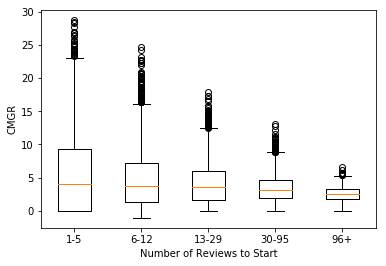

In [125]:
plt.boxplot([paris25.cmg_pct, paris50.cmg_pct, paris75.cmg_pct, paris95.cmg_pct, paris100.cmg_pct])
plt.xticks([1,2,3,4,5], ['1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('CMGR')
plt.show()
# as expected, CMGR tends to be lower in rentals that start with a higher number of reviews. 

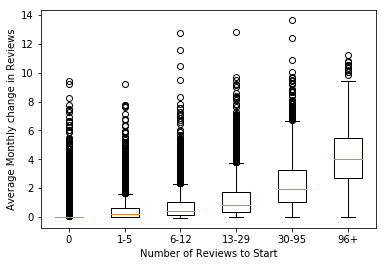

In [126]:
plt.boxplot([paris0.avg_revchange, paris25.avg_revchange, paris50.avg_revchange, paris75.avg_revchange, paris95.avg_revchange, paris100.avg_revchange])
plt.xticks([1,2,3,4,5, 6], ['0', '1-5', '6-12', '13-29', '30-95', '96+'])
plt.xlabel('Number of Reviews to Start')
plt.ylabel('Average Monthly change in Reviews')
plt.show()

Reviews with a high number of reviews to start tend to have a higher monthly increase in reviews. Let's test to see if there is a statistically significant difference between the mean avg change in monthly reviews among these groups. The null hypothesis that:

$H_0$ : $\mu_{1-5 revs}$ = $\mu_{6-12 revs}$ = $\mu_{13-29 revs}$ = $\mu_{30-95 revs}$ = $\mu_{96+ revs}$

Where $\mu$ is the mean monthly average change in reviews. Here, we will be using a significance value of $\alpha = 0.05$, or a 95% confidence interval. To reject the null hypothesis, we need to see $p \leq 0.05$ in the one-way ANOVA test.



In [127]:
import numpy as np 
from scipy import stats

# One-way ANOVA

f, p = stats.f_oneway(paris0.avg_revchange, paris25.avg_revchange, paris50.avg_revchange, 
                      paris75.avg_revchange, paris95.avg_revchange, paris100.avg_revchange)


print('One-way ANOVA')
print('----------------')
print('F value:', f)
print('P value', p)

One-way ANOVA
----------------
F value: 2588.94158937
P value 0.0


We can reject the null hypothesis and say that the mean monthly change in reviews is different. But is it different within each group? We will test with Tukey's test.

In [128]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
paris0['ptile']= 0
paris25['ptile'] = 25
paris50['ptile'] = 50
paris75['ptile'] = 75
paris95['ptile'] = 95
paris100['ptile'] = 100

paris_all = pd.concat([paris0, paris25, paris50, paris75, paris95, paris100])
# combine three dataframes into one

mc = MultiComparison(paris_all.avg_revchange, paris_all.ptile)
result = mc.tukeyhsd()

print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
  0      25    0.3377  0.2684 0.4071  True 
  0      50    0.5787  0.5122 0.6453  True 
  0      75    1.0965  1.0277 1.1653  True 
  0      95    2.1194  2.045  2.1938  True 
  0     100    4.0438  3.9099 4.1777  True 
  25     50    0.241   0.1634 0.3186  True 
  25     75    0.7587  0.6792 0.8383  True 
  25     95    1.7817  1.6972 1.8662  True 
  25    100    3.7061  3.5663 3.8459  True 
  50     75    0.5177  0.4406 0.5949  True 
  50     95    1.5407  1.4584 1.6229  True 
  50    100    3.4651  3.3267 3.6035  True 
  75     95    1.0229  0.9389 1.107   True 
  75    100    2.9474  2.8079 3.0868  True 
  95    100    1.9244  1.7821 2.0668  True 
-------------------------------------------


/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

Tukey's test tells us that there is a statistically significant difference in the mean average monthly change in reviews between each of our groups; rentals that start with a high number of reviews tend to get more reviews per month. 

Next, we will want to look at each of these groups to see who is successfully increasing their number of reviews and why. Now we will be interested in the CMGR. 

In [129]:
# look at places wtih 1-5 reviews: 25th ptile CMGR


paris25_cmgr, paris25_cmgr_hi = split_data(paris25, 'cmg_pct', np.percentile(paris25.cmg_pct, 25))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris25_cmgr, paris25_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     51.22
Date:                Sun, 25 Mar 2018   Prob (F-statistic):          1.66e-150
Time:                        10:47:17   Log-Likelihood:                 442.26
No. Observations:                1009   AIC:                            -836.5
Df Residuals:                     985   BIC:                            -718.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.616078,0.023162,1.598848,0.012327,0.878699
1,accommodates,0.041914,0.005418,0.044147,0.002605,-0.470077
2,bedrooms,0.107629,0.009064,0.113800,0.004526,-0.785729
3,room_type_Private room,-0.178845,0.016365,-0.170452,0.009453,-0.628282
4,room_type_Shared room,-0.417759,0.112999,-0.385824,0.049496,-0.314373
5,arrondissement_1,0.302368,0.045284,0.331753,0.019534,-0.719261
6,arrondissement_2,0.205485,0.038906,0.199409,0.018888,0.178640
7,arrondissement_3,0.268609,0.040435,0.246112,0.016567,0.609941
8,arrondissement_4,0.228022,0.039641,0.262053,0.017139,-0.952085
9,arrondissement_5,0.160294,0.034450,0.185783,0.017627,-0.861136


In [130]:
# look at places wtih 1-5 reviews: 50th ptile cMGR

paris25_cmgr, paris25_cmgr_hi = split_data(paris25, 'cmg_pct', np.percentile(paris25.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris25_cmgr, paris25_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     99.46
Date:                Sun, 25 Mar 2018   Prob (F-statistic):          3.98e-296
Time:                        10:47:18   Log-Likelihood:                 693.83
No. Observations:                1756   AIC:                            -1340.
Df Residuals:                    1732   BIC:                            -1208.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.596574,0.018129,1.595819,0.016524,0.101255
1,accommodates,0.049155,0.004165,0.041770,0.003275,2.870235
2,bedrooms,0.104180,0.006842,0.119503,0.005903,-4.431153
3,room_type_Private room,-0.165954,0.013672,-0.176826,0.012906,2.410465
4,room_type_Shared room,-0.346433,0.082537,-0.416627,0.060799,1.257518
5,arrondissement_1,0.352897,0.033314,0.330287,0.023614,0.962163
6,arrondissement_2,0.214919,0.031431,0.196017,0.023328,0.897322
7,arrondissement_3,0.268464,0.028751,0.243956,0.020144,1.194710
8,arrondissement_4,0.227860,0.029935,0.283021,0.020858,-2.568911
9,arrondissement_5,0.182551,0.026543,0.195147,0.023051,-0.957134


In [131]:
# look at places wtih 1-5 reviews: 75th ptile CMGR


paris25_cmgr, paris25_cmgr_hi = split_data(paris25, 'cmg_pct', np.percentile(paris25.cmg_pct, 75))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris25_cmgr, paris25_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:47:21   Log-Likelihood:                 1125.9
No. Observations:                2630   AIC:                            -2204.
Df Residuals:                    2606   BIC:                            -2063.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.594049,0.013928,1.617684,0.027571,-0.993340
1,accommodates,0.045097,0.003091,0.043971,0.004899,0.296197
2,bedrooms,0.111650,0.005279,0.115397,0.009087,-0.506705
3,room_type_Private room,-0.168533,0.011047,-0.173199,0.018261,0.320896
4,room_type_Shared room,-0.333635,0.060292,-0.499405,0.085063,2.762571
5,arrondissement_1,0.362266,0.024403,0.269749,0.034994,3.688629
6,arrondissement_2,0.209205,0.024381,0.173508,0.033277,1.576160
7,arrondissement_3,0.264868,0.020206,0.201857,0.031571,2.597471
8,arrondissement_4,0.259497,0.022050,0.251405,0.031095,0.369072
9,arrondissement_5,0.191279,0.020578,0.161606,0.035338,1.032875


In [132]:
# look at places wtih 1-5 reviews: 95th ptile CMGR
paris25_cmgr, paris25_cmgr_hi = split_data(paris25, 'cmg_pct', np.percentile(paris25.cmg_pct, 95))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris25_cmgr, paris25_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     225.7
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:48:05   Log-Likelihood:                 1474.3
No. Observations:                3332   AIC:                            -2901.
Df Residuals:                    3308   BIC:                            -2754.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.596424,0.012552,1.646850,0.081117,-0.629226
1,accommodates,0.044643,0.002705,0.040104,0.010510,0.446911
2,bedrooms,0.113859,0.004670,0.111842,0.021426,0.096473
3,room_type_Private room,-0.170228,0.009789,-0.149612,0.041357,-0.513078
4,room_type_Shared room,-0.397928,0.052289,-0.324053,0.152838,-0.514389
5,arrondissement_1,0.341932,0.020676,0.241413,0.084719,1.223497
6,arrondissement_2,0.198358,0.019637,0.184802,0.089563,0.155132
7,arrondissement_3,0.251779,0.017139,0.166531,0.085695,1.015293
8,arrondissement_4,0.253936,0.017996,0.284494,0.084547,-0.369913
9,arrondissement_5,0.186188,0.017969,0.158547,0.100725,0.278888


In [335]:
# look at places wtih 6-13 reviews: 25th ptile CMGR
paris50_cmgr, paris50_cmgr_hi = split_data(paris50, 'cmg_pct', np.percentile(paris50.cmg_pct, 25))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris50_cmgr, paris50_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     65.42
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          8.31e-169
Time:                        11:09:20   Log-Likelihood:                 400.36
No. Observations:                 856   AIC:                            -752.7
Df Residuals:                     832   BIC:                            -638.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.583868,0.024172,1.602440,0.015106,-0.984186
1,accommodates,0.050220,0.005079,0.040360,0.002901,2.365539
2,bedrooms,0.108322,0.008701,0.123188,0.005126,-2.114550
3,room_type_Private room,-0.153903,0.019449,-0.151055,0.010756,-0.175758
4,room_type_Shared room,-0.220268,0.155882,-0.401682,0.040479,1.205131
5,arrondissement_1,0.383016,0.049057,0.265065,0.022820,2.716114
6,arrondissement_2,0.185381,0.036636,0.200199,0.020531,-0.488365
7,arrondissement_3,0.291563,0.030416,0.200137,0.018851,3.830220
8,arrondissement_4,0.234407,0.036207,0.278053,0.019009,-1.416332
9,arrondissement_5,0.285256,0.034650,0.191177,0.019302,3.269354


In [255]:
# look at places wtih 6-13 reviews: 50th ptile CMGR
paris50_cmgr, paris50_cmgr_hi = split_data(paris50, 'cmg_pct', np.percentile(paris50.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris50_cmgr, paris50_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:17:43   Log-Likelihood:                 780.99
No. Observations:                1662   AIC:                            -1514.
Df Residuals:                    1638   BIC:                            -1384.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.593943,0.017222,1.599086,0.019526,-0.558932
1,accommodates,0.045750,0.003680,0.040330,0.003497,4.737269
2,bedrooms,0.116955,0.006336,0.122157,0.006241,-4.764405
3,room_type_Private room,-0.145180,0.014097,-0.154472,0.012888,1.627221
4,room_type_Shared room,-0.332332,0.076644,-0.404994,0.045762,1.181824
5,arrondissement_1,0.324158,0.033338,0.266839,0.027522,3.046700
6,arrondissement_2,0.204375,0.026507,0.191160,0.025229,1.625448
7,arrondissement_3,0.250807,0.022178,0.202012,0.023857,5.550182
8,arrondissement_4,0.268192,0.023874,0.272666,0.024060,-1.497019
9,arrondissement_5,0.221609,0.023805,0.195975,0.024378,4.879103


In [254]:
# look at places wtih 6-13 reviews: 75th ptile CMGR
paris50_cmgr, paris50_cmgr_hi = split_data(paris50, 'cmg_pct', np.percentile(paris50.cmg_pct, 75))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris50_cmgr, paris50_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     192.4
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:17:21   Log-Likelihood:                 1176.3
No. Observations:                2537   AIC:                            -2305.
Df Residuals:                    2513   BIC:                            -2164.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.594384,0.014393,1.604027,0.028276,-0.396192
1,accommodates,0.044536,0.002964,0.041020,0.004789,0.934912
2,bedrooms,0.117256,0.005108,0.116594,0.008920,0.090477
3,room_type_Private room,-0.149162,0.011253,-0.148583,0.017265,-0.044223
4,room_type_Shared room,-0.272229,0.062967,-0.455909,0.049189,4.672496
5,arrondissement_1,0.294058,0.024868,0.281838,0.037211,0.441440
6,arrondissement_2,0.205483,0.021271,0.183809,0.034448,0.799936
7,arrondissement_3,0.240031,0.018808,0.190315,0.032190,1.903121
8,arrondissement_4,0.290650,0.019283,0.219478,0.033902,2.552413
9,arrondissement_5,0.215422,0.019505,0.201319,0.033977,0.506918


In [253]:
# look at places wtih 6-12 reviews: 95th ptile CMGR
paris50_cmgr, paris50_cmgr_hi = split_data(paris50, 'cmg_pct', np.percentile(paris50.cmg_pct, 95))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris50_cmgr, paris50_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:17:06   Log-Likelihood:                 1473.9
No. Observations:                3156   AIC:                            -2900.
Df Residuals:                    3132   BIC:                            -2755.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.594913,0.013153,1.748986,0.082523,-1.891221
1,accommodates,0.043656,0.002631,0.031043,0.009952,1.314075
2,bedrooms,0.118903,0.004581,0.113248,0.020965,0.276417
3,room_type_Private room,-0.150957,0.009797,-0.154634,0.040357,0.093917
4,room_type_Shared room,-0.375781,0.044232,-0.531027,0.095469,1.834963
5,arrondissement_1,0.282761,0.021195,0.207081,0.104886,0.736749
6,arrondissement_2,0.197750,0.018869,0.084642,0.090472,1.278319
7,arrondissement_3,0.231362,0.016670,0.043809,0.088814,2.149963
8,arrondissement_4,0.279585,0.017263,0.044986,0.090078,2.653573
9,arrondissement_5,0.210299,0.017470,0.098128,0.091243,1.252537


In [266]:
# look at places with 13-29 reviews: 25h percentile CMGR

paris75_cmgr, paris75_cmgr_hi = split_data(paris75, 'cmg_pct', np.percentile(paris75.cmg_pct, 25))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris75_cmgr, paris75_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     54.92
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          4.68e-148
Time:                        10:26:17   Log-Likelihood:                 400.48
No. Observations:                 836   AIC:                            -753.0
Df Residuals:                     812   BIC:                            -639.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.594819,0.023028,1.621438,0.014783,-1.507542
1,accommodates,0.040321,0.005400,0.040275,0.002819,0.009904
2,bedrooms,0.115389,0.010151,0.114505,0.005163,0.101092
3,room_type_Private room,-0.131486,0.018788,-0.166029,0.011304,2.301727
4,room_type_Shared room,-0.402619,0.109094,-0.314129,0.034128,-0.853995
5,arrondissement_1,0.290387,0.047258,0.253328,0.021287,0.878326
6,arrondissement_2,0.191552,0.037925,0.169859,0.018087,0.650798
7,arrondissement_3,0.291506,0.031065,0.198402,0.017347,3.612906
8,arrondissement_4,0.306900,0.032983,0.276853,0.018252,1.093724
9,arrondissement_5,0.256047,0.031647,0.186189,0.018720,2.737770


In [265]:
# look at places with 13-29 reviews: 50th percentile CMGR


paris75_cmgr, paris75_cmgr_hi = split_data(paris75, 'cmg_pct', np.percentile(paris75.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris75_cmgr, paris75_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     133.1
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:25:41   Log-Likelihood:                 781.83
No. Observations:                1663   AIC:                            -1516.
Df Residuals:                    1639   BIC:                            -1386.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.591351,0.016861,1.636484,0.018512,-5.904540
1,accommodates,0.045277,0.003796,0.038153,0.003305,3.814390
2,bedrooms,0.117375,0.006908,0.105043,0.006215,4.090922
3,room_type_Private room,-0.150363,0.014069,-0.156135,0.013214,1.195195
4,room_type_Shared room,-0.323396,0.068831,-0.314769,0.036303,-0.147519
5,arrondissement_1,0.288250,0.031652,0.245382,0.024893,2.192807
6,arrondissement_2,0.195565,0.024011,0.159591,0.022083,3.815808
7,arrondissement_3,0.261067,0.021911,0.185199,0.021150,13.253333
8,arrondissement_4,0.301157,0.024023,0.270138,0.021766,3.051171
9,arrondissement_5,0.229073,0.022330,0.177680,0.023376,7.434634


In [264]:
# look at places with 13-29 reviews: 75th percentile CMGR

paris75_cmgr, paris75_cmgr_hi = split_data(paris75, 'cmg_pct', np.percentile(paris75.cmg_pct, 75))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris75_cmgr, paris75_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:25:23   Log-Likelihood:                 1204.4
No. Observations:                2497   AIC:                            -2361.
Df Residuals:                    2473   BIC:                            -2221.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.605556,0.013948,1.641406,0.027585,-1.506357
1,accommodates,0.044104,0.002992,0.035970,0.004487,2.432650
2,bedrooms,0.108229,0.005436,0.114955,0.008983,-0.940369
3,room_type_Private room,-0.151192,0.011425,-0.159055,0.017779,0.577247
4,room_type_Shared room,-0.311902,0.048018,-0.325869,0.041184,0.565673
5,arrondissement_1,0.272650,0.022990,0.236677,0.035553,1.326497
6,arrondissement_2,0.191696,0.019050,0.142472,0.031389,1.973181
7,arrondissement_3,0.246282,0.017350,0.146246,0.031035,3.887588
8,arrondissement_4,0.298846,0.019130,0.252314,0.030633,1.944878
9,arrondissement_5,0.220260,0.018436,0.158385,0.033381,2.223460


In [263]:
paris75_cmgr, paris75_cmgr_hi = split_data(paris75, 'cmg_pct', np.percentile(paris75.cmg_pct, 95))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris75_cmgr, paris75_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:25:05   Log-Likelihood:                 1537.2
No. Observations:                3157   AIC:                            -3026.
Df Residuals:                    3133   BIC:                            -2881.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.611125,0.012771,1.658502,0.054858,-0.888016
1,accommodates,0.040648,0.002582,0.045270,0.009949,-0.481098
2,bedrooms,0.114280,0.004749,0.079913,0.020530,1.720633
3,room_type_Private room,-0.156345,0.010043,-0.107180,0.036825,-1.387722
4,room_type_Shared room,-0.327365,0.033695,-0.194894,0.137234,-0.995776
5,arrondissement_1,0.265291,0.020033,0.211304,0.066809,0.847068
6,arrondissement_2,0.184602,0.016733,0.092425,0.059386,1.617730
7,arrondissement_3,0.225073,0.015602,0.133035,0.059059,1.615802
8,arrondissement_4,0.294373,0.016513,0.167247,0.059819,2.211106
9,arrondissement_5,0.208890,0.016503,0.111197,0.081928,1.217378


In [267]:
# look at places with 30-95 reviews: 25th percentile CMGR

paris95_cmgr, paris95_cmgr_hi = split_data(paris95, 'cmg_pct', np.percentile(paris95.cmg_pct, 25))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris95_cmgr, paris95_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     63.97
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          9.70e-153
Time:                        10:26:37   Log-Likelihood:                 427.00
No. Observations:                 702   AIC:                            -806.0
Df Residuals:                     678   BIC:                            -696.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.620186,0.026968,1.579800,0.018976,2.107577
1,accommodates,0.054949,0.004780,0.039194,0.002787,4.057884
2,bedrooms,0.108026,0.009804,0.106013,0.005640,0.250970
3,room_type_Private room,-0.124637,0.017792,-0.137823,0.010808,0.933049
4,room_type_Shared room,-0.306202,0.049310,-0.378356,0.033945,2.017409
5,arrondissement_1,0.253348,0.039152,0.287015,0.023418,-1.073011
6,arrondissement_2,0.169180,0.033937,0.226893,0.021937,-2.228868
7,arrondissement_3,0.241050,0.031531,0.243437,0.020648,-0.100146
8,arrondissement_4,0.240383,0.032030,0.277055,0.020976,-1.515029
9,arrondissement_5,0.156517,0.035168,0.221625,0.022771,-2.429326


In [268]:
# look at places with 30-95 reviews: 50th percentile CMGR


paris95_cmgr, paris95_cmgr_hi = split_data(paris95, 'cmg_pct', np.percentile(paris95.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris95_cmgr, paris95_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 24 Mar 2018   Prob (F-statistic):          9.85e-290
Time:                        10:27:00   Log-Likelihood:                 792.41
No. Observations:                1397   AIC:                            -1537.
Df Residuals:                    1373   BIC:                            -1411.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.617794,0.020718,1.567095,0.023874,4.273703
1,accommodates,0.048925,0.003424,0.036713,0.003406,34.822896
2,bedrooms,0.100622,0.006840,0.109891,0.007065,-5.243386
3,room_type_Private room,-0.122728,0.013250,-0.139571,0.013163,11.104926
4,room_type_Shared room,-0.305062,0.043018,-0.386062,0.037796,3.943166
5,arrondissement_1,0.251976,0.027572,0.299781,0.029257,-4.885042
6,arrondissement_2,0.174414,0.025607,0.248050,0.027056,-8.428451
7,arrondissement_3,0.220423,0.023110,0.256736,0.026083,-3.002732
8,arrondissement_4,0.249311,0.023957,0.285973,0.026135,-3.510061
9,arrondissement_5,0.177727,0.025716,0.227987,0.028839,-3.850617


In [269]:
# look at places with 30-95 reviews: 75th percentile CMGR


paris95_cmgr, paris95_cmgr_hi = split_data(paris95, 'cmg_pct', np.percentile(paris95.cmg_pct, 75))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris95_cmgr, paris95_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     148.1
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:27:18   Log-Likelihood:                 1108.7
No. Observations:                2095   AIC:                            -2169.
Df Residuals:                    2071   BIC:                            -2034.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.607611,0.017806,1.557552,0.033549,1.760563
1,accommodates,0.042909,0.002808,0.040654,0.004705,0.597385
2,bedrooms,0.106191,0.005601,0.103203,0.010345,0.343612
3,room_type_Private room,-0.128031,0.010745,-0.145384,0.018881,1.117736
4,room_type_Shared room,-0.299543,0.036591,-0.440845,0.044595,5.543360
5,arrondissement_1,0.268073,0.023082,0.284902,0.040446,-0.506722
6,arrondissement_2,0.186630,0.021602,0.269443,0.036796,-2.780105
7,arrondissement_3,0.227611,0.019746,0.264703,0.036335,-1.216059
8,arrondissement_4,0.264446,0.020248,0.269415,0.036193,-0.165636
9,arrondissement_5,0.188135,0.021799,0.243788,0.041171,-1.593454


In [270]:
# look at places with 30-95 reviews: 95th percentile CMGR


paris95_cmgr, paris95_cmgr_hi = split_data(paris95, 'cmg_pct', np.percentile(paris95.cmg_pct, 95))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris95_cmgr, paris95_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sat, 24 Mar 2018   Prob (F-statistic):               0.00
Time:                        10:27:40   Log-Likelihood:                 1404.1
No. Observations:                2653   AIC:                            -2760.
Df Residuals:                    2629   BIC:                            -2619.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.597747,0.016615,1.683803,0.059957,-1.493775
1,accommodates,0.041792,0.002429,0.015602,0.014431,1.841180
2,bedrooms,0.107812,0.004979,0.122953,0.025068,-0.616294
3,room_type_Private room,-0.132203,0.009506,-0.222040,0.044296,2.076472
4,room_type_Shared room,-0.348289,0.029189,-0.548044,0.117018,1.762774
5,arrondissement_1,0.272866,0.020889,0.132768,0.087463,1.649546
6,arrondissement_2,0.207006,0.019452,0.165589,0.068703,0.628551
7,arrondissement_3,0.235966,0.018271,0.177503,0.065706,0.926307
8,arrondissement_4,0.264660,0.018625,0.199263,0.060247,1.141392
9,arrondissement_5,0.200009,0.020112,0.198339,0.091269,0.018762


In [271]:
# look at places with 96+ reviews: 95th percentile CMGR


paris100_cmgr, paris100_cmgr_hi = split_data(paris100, 'cmg_pct', np.percentile(paris100.cmg_pct, 25))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris100_cmgr, paris100_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     5.129
Date:                Sat, 24 Mar 2018   Prob (F-statistic):           2.67e-10
Time:                        10:29:14   Log-Likelihood:                 102.37
No. Observations:                 172   AIC:                            -156.7
Df Residuals:                     148   BIC:                            -81.21
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.683138,0.104327,1.640672,0.056001,0.482445
1,accommodates,0.024271,0.010434,0.044150,0.006127,-2.353637
2,bedrooms,0.030882,0.025496,0.087858,0.012630,-2.572557
3,room_type_Private room,-0.150031,0.032969,-0.120111,0.020234,-1.149428
4,room_type_Shared room,-0.453092,0.168361,-0.267695,0.071534,-1.216456
5,arrondissement_1,0.298158,0.120442,0.153836,0.059013,1.374571
6,arrondissement_2,0.236515,0.115860,0.117764,0.058977,1.190767
7,arrondissement_3,0.200895,0.110545,0.155439,0.057524,0.481526
8,arrondissement_4,0.219828,0.111234,0.155416,0.055808,0.669420
9,arrondissement_5,0.241142,0.113120,0.137883,0.059227,1.071421


In [272]:
# look at places with 96+ reviews: 50th percentile CMGR


paris100_cmgr, paris100_cmgr_hi = split_data(paris100, 'cmg_pct', np.percentile(paris100.cmg_pct, 50))
X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi = linear_model(paris100_cmgr, paris100_cmgr_hi)
cmgr_df = compare_coefficients(X_cmgr, lm_cmgr, X_cmgr_hi, lm_cmgr_hi)
cmgr_df

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     11.10
Date:                Sat, 24 Mar 2018   Prob (F-statistic):           6.69e-29
Time:                        10:29:43   Log-Likelihood:                 189.61
No. Observations:                 343   AIC:                            -331.2
Df Residuals:                     319   BIC:                            -239.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

,variable,coef_sm,se_sm,coef_lg,se_lg,z_score
0,const,1.678658,0.085581,1.645156,0.060935,0.557508
1,accommodates,0.031477,0.007768,0.044846,0.007312,-5.099460
2,bedrooms,0.078091,0.017607,0.078895,0.015010,-0.087310
3,room_type_Private room,-0.123129,0.024118,-0.145874,0.025229,3.071925
4,room_type_Shared room,-0.397615,0.087112,-0.154502,0.101048,-4.747535
5,arrondissement_1,0.246688,0.094637,0.140108,0.063925,1.527284
6,arrondissement_2,0.136768,0.091029,0.133258,0.064981,0.055056
7,arrondissement_3,0.148217,0.088532,0.147934,0.062666,0.004515
8,arrondissement_4,0.163257,0.086355,0.159467,0.062058,0.063122
9,arrondissement_5,0.181837,0.091325,0.123218,0.064153,0.901871
